In [1]:
"""
Name: con_tracing.ipynb
Authors: Stephan Meighen-Berger
Example for the tracing of the infection spread
"""
%load_ext autoreload
%autoreload 2

In [38]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm
import pandas as pd

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [3]:
# Adding path to module
sys.path.append("../")
# picture path
PICS = '../pics/'

In [4]:
# Module imports
from contagion import Contagion, config

In [5]:
# Options
config["infected"] = 1
config["simulation length"] = 10
config["average social circle"] = 40
config["population size"] = 100
config["random state"] = np.random.RandomState(1337)

In [6]:
# Creating a contagion object
contagion = Contagion()

In [7]:
 # Storing the solutions
contagion.sim()
stats = pd.DataFrame(contagion.statistics)

In [8]:
stats

,is_removed,is_incubation,is_latent,is_infectious,is_infected,can_infect,is_hospitalized,is_recovered,is_dead
0,0,0,2,1,3,1,0,0,0
1,0,0,3,1,4,1,0,0,0
2,0,1,4,1,6,2,0,0,0
3,0,1,5,1,7,2,0,0,0
4,0,2,6,1,9,3,0,0,0
5,1,2,9,0,12,3,0,0,0
6,1,4,11,0,16,5,0,0,0
7,1,6,13,0,20,7,0,0,0
8,1,6,20,0,27,7,0,0,0
9,1,6,19,3,29,10,0,0,0


In [9]:
t_s = contagion.trace_spread

In [11]:
gr = nx.Graph()

In [12]:
nodes = np.unique(np.squeeze(np.hstack([i for i in t_s])).flatten())

In [26]:
nodes_col = [np.unique(i).tolist() for i in t_s]

In [13]:
edges = np.squeeze(np.hstack([i for i in t_s])).tolist()

In [14]:
edges_col = [np.squeeze(i).tolist() for i in t_s]

In [27]:
gr.add_nodes_from(nodes)

In [28]:
gr.add_edges_from(edges)

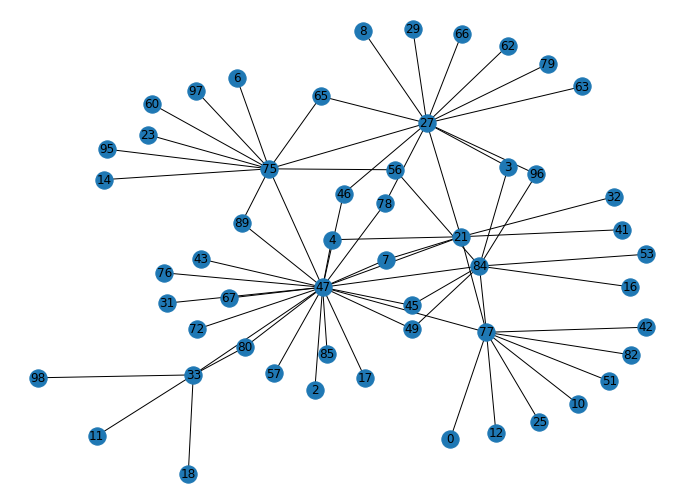

In [57]:
fig, ax = plt.subplots(figsize=(12,9))
pos = graphviz_layout(gr)
nx.draw(gr, pos=pos, with_labels=True)

In [58]:
fig.savefig(PICS+'graph.png')